In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math


# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip, ImageClip
from IPython.display import HTML
%matplotlib inline

In [21]:
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    poly = cv2.fillPoly(mask, vertices, ignore_mask_color)
#     plt.imshow(poly)
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.1):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, γ)

def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    #reading in an image

    img = mpimg.imread(image)
    #printing out some stats and plotting
    # print('This image is:', type(image), 'with dimensions:', image.shape)
    # plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
    gray = grayscale(img)
    # plt.imshow(gray,cmap='gray')
    blur = gaussian_blur(gray,kernel_size=9)
    # plt.imshow(blur,cmap='gray')
    # Define our parameters for Canny and apply
    low_threshold = 20
    high_threshold = 40
    edge = canny(blur,low_threshold,high_threshold)
    # plt.imshow(edge,cmap='gray')
    imshape = image.shape
    vertices = np.array([[(200,imshape[0]),(430, 310), (550, 350), (imshape[1],imshape[0])]], dtype=np.int32)
    print(vertices)
    masked = region_of_interest(edge,vertices)
    # plt.imshow(masked,cmap='gray')
    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 15    # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 80 #minimum number of pixels making up a line
    max_line_gap = 80   # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on
    lines = hough_lines(masked, rho, theta, threshold, min_line_length, max_line_gap)
    # plt.imshow(lines)
    result = weighted_img(lines, image)
    plt.imshow(result)
#     cv2.imwrite(output_file,result)

    return result

def blur(image):
    gray = grayscale(image)
    # plt.imshow(gray,cmap='gray')
    blur = gaussian_blur(gray,kernel_size=9)
    """ Returns a blurred (radius=2 pixels) version of the image """
    return blur

True

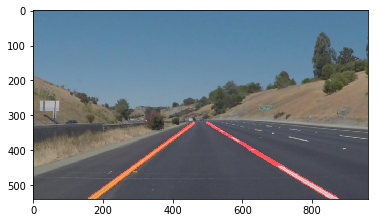

In [3]:
# image_name = 'solidYellowCurve2'
read_file = 'test_images/solidYellowCurve2.jpg'
output_file = 'output_images/solidYellowCurve2_Lane.jpg'
#reading in an image
image = mpimg.imread(read_file)
#printing out some stats and plotting
# print('This image is:', type(image), 'with dimensions:', image.shape)
# plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
gray = grayscale(image)
# plt.imshow(gray,cmap='gray')
blur = gaussian_blur(gray,kernel_size=3)
# plt.imshow(blur,cmap='gray')
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edge = canny(blur,low_threshold,high_threshold)
# plt.imshow(edge,cmap='gray')
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 320), (500, 320), (imshape[1],imshape[0])]], dtype=np.int32)
masked = region_of_interest(edge,vertices)
# plt.imshow(masked,cmap='gray')
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 20    # minimum number of votes (intersections in Hough grid cell)
min_line_length = 100 #minimum number of pixels making up a line
max_line_gap = 100   # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on
lines = hough_lines(masked, rho, theta, threshold, min_line_length, max_line_gap)
# plt.imshow(lines)
result = weighted_img(lines, image)
plt.imshow(result)
cv2.imwrite(output_file,result)

True

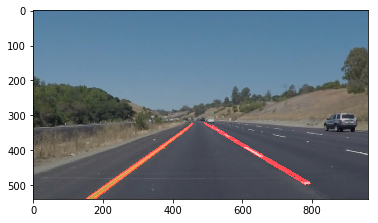

In [4]:
# image_name = 'solidYellowCurve'
read_file = 'test_images/solidYellowCurve.jpg'
output_file = 'output_images/solidYellowCurve_Lane.jpg'
#reading in an image

image = mpimg.imread(read_file)
#printing out some stats and plotting
# print('This image is:', type(image), 'with dimensions:', image.shape)
# plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
gray = grayscale(image)
# plt.imshow(gray,cmap='gray')
blur = gaussian_blur(gray,kernel_size=7)
# plt.imshow(blur,cmap='gray')
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edge = canny(blur,low_threshold,high_threshold)
plt.imshow(edge,cmap='gray')
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 320), (500, 320), (imshape[1],imshape[0])]], dtype=np.int32)
masked = region_of_interest(edge,vertices)
# plt.imshow(masked,cmap='gray')
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15    # minimum number of votes (intersections in Hough grid cell)
min_line_length = 250 #minimum number of pixels making up a line
max_line_gap = 250   # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on
lines = hough_lines(masked, rho, theta, threshold, min_line_length, max_line_gap)
# plt.imshow(lines)
result = weighted_img(lines, image)
plt.imshow(result)
cv2.imwrite(output_file,result)

True

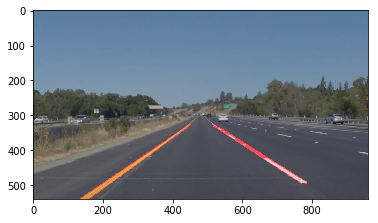

In [5]:
# image_name = 'solidYellowLeft'
read_file = 'test_images/solidYellowLeft.jpg'
output_file = 'output_images/solidYellowLeft_Lane.jpg'
#reading in an image

image = mpimg.imread(read_file)
#printing out some stats and plotting
# print('This image is:', type(image), 'with dimensions:', image.shape)
# plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
gray = grayscale(image)
# plt.imshow(gray,cmap='gray')
blur = gaussian_blur(gray,kernel_size=7)
# plt.imshow(blur,cmap='gray')
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edge = canny(blur,low_threshold,high_threshold)
plt.imshow(edge,cmap='gray')
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 320), (500, 320), (imshape[1],imshape[0])]], dtype=np.int32)
masked = region_of_interest(edge,vertices)
# plt.imshow(masked,cmap='gray')
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15    # minimum number of votes (intersections in Hough grid cell)
min_line_length = 250 #minimum number of pixels making up a line
max_line_gap = 250   # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on
lines = hough_lines(masked, rho, theta, threshold, min_line_length, max_line_gap)
# plt.imshow(lines)
result = weighted_img(lines, image)
plt.imshow(result)
cv2.imwrite(output_file,result)

True

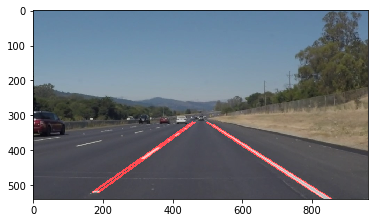

In [6]:
# image_name = 'solidWhiteRight'
read_file = 'test_images/solidWhiteRight.jpg'
output_file = 'output_images/solidWhiteRight_Lane.jpg'
#reading in an image

image = mpimg.imread(read_file)
#printing out some stats and plotting
# print('This image is:', type(image), 'with dimensions:', image.shape)
# plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
gray = grayscale(image)
# plt.imshow(gray,cmap='gray')
blur = gaussian_blur(gray,kernel_size=7)
# plt.imshow(blur,cmap='gray')
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edge = canny(blur,low_threshold,high_threshold)
plt.imshow(edge,cmap='gray')
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 320), (500, 320), (imshape[1],imshape[0])]], dtype=np.int32)
masked = region_of_interest(edge,vertices)
# plt.imshow(masked,cmap='gray')
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15    # minimum number of votes (intersections in Hough grid cell)
min_line_length = 250 #minimum number of pixels making up a line
max_line_gap = 250   # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on
lines = hough_lines(masked, rho, theta, threshold, min_line_length, max_line_gap)
# plt.imshow(lines)
result = weighted_img(lines, image)
plt.imshow(result)
cv2.imwrite(output_file,result)

True

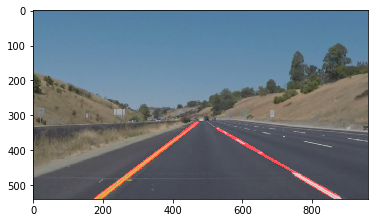

In [7]:
image_name = 'whiteCarLaneSwitch'
# image_name = 'solidWhiteCurve'


read_file = 'test_images/whiteCarLaneSwitch.jpg'
output_file = 'output_images/whiteCarLaneSwitch_Lane.jpg'
#reading in an image

image = mpimg.imread(read_file)
#printing out some stats and plotting
# print('This image is:', type(image), 'with dimensions:', image.shape)
# plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
gray = grayscale(image)
# plt.imshow(gray,cmap='gray')
blur = gaussian_blur(gray,kernel_size=7)
# plt.imshow(blur,cmap='gray')
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edge = canny(blur,low_threshold,high_threshold)
# plt.imshow(edge,cmap='gray')
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 320), (500, 320), (imshape[1],imshape[0])]], dtype=np.int32)
masked = region_of_interest(edge,vertices)
# plt.imshow(masked,cmap='gray')
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15    # minimum number of votes (intersections in Hough grid cell)
min_line_length = 100 #minimum number of pixels making up a line
max_line_gap = 100   # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on
lines = hough_lines(masked, rho, theta, threshold, min_line_length, max_line_gap)
# plt.imshow(lines)
result = weighted_img(lines, image)
plt.imshow(result)
cv2.imwrite(output_file,result)

[[[200 540]
  [430 310]
  [550 350]
  [960 540]]]


True

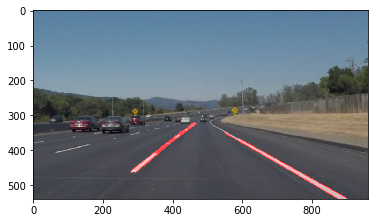

In [8]:
image_name = 'solidWhiteCurve'


read_file = 'test_images/solidWhiteCurve.jpg'
output_file = 'output_images/solidWhiteCurve_Lane.jpg'
#reading in an image

image = mpimg.imread(read_file)
#printing out some stats and plotting
# print('This image is:', type(image), 'with dimensions:', image.shape)
# plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
gray = grayscale(image)
# plt.imshow(gray,cmap='gray')
blur = gaussian_blur(gray,kernel_size=9)
# plt.imshow(blur,cmap='gray')
# Define our parameters for Canny and apply
low_threshold = 20
high_threshold = 40
edge = canny(blur,low_threshold,high_threshold)
# plt.imshow(edge,cmap='gray')
imshape = image.shape
vertices = np.array([[(200,imshape[0]),(430, 310), (550, 350), (imshape[1],imshape[0])]], dtype=np.int32)
print(vertices)
masked = region_of_interest(edge,vertices)
# plt.imshow(masked,cmap='gray')
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15    # minimum number of votes (intersections in Hough grid cell)
min_line_length = 80 #minimum number of pixels making up a line
max_line_gap = 80   # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on
lines = hough_lines(masked, rho, theta, threshold, min_line_length, max_line_gap)
# plt.imshow(lines)
result = weighted_img(lines, image)
plt.imshow(result)
cv2.imwrite(output_file,result)

In [7]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
# clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(grayscale) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

# fps= 1.0 # take one frame per second
# nframes = clip1.duration*fps # total number of frames used
# total_image = sum(clip1.iter_frames(fps,dtype=float,progress_bar=True))
# average_image = ImageClip(total_image/ nframes)
# average_image.save_frame("average_test.png")


# # clip = VideoFileClip("my_video.mp4")
# clip_blurred = clip1.fl_image( blur )
# clip_blurred.write_videofile("blurred_video.mp4")

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


 99%|█████████▉| 125/126 [00:00<00:00, 497.88it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 161 ms, sys: 61.1 ms, total: 222 ms
Wall time: 264 ms


In [8]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(clip1))

In [10]:
cap = cv2.VideoCapture('test_videos_output/solidWhiteRight.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [9]:
read_file = 'test_images/solidYellowCurve2.jpg'
image = mpimg.imread(read_file)
h, w, _ = image.shape

In [10]:
print(h,w)

540 960


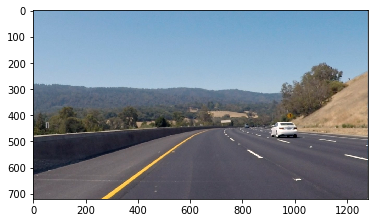

In [17]:
# image_name = 'solidYellowCurve2'
read_file = 'test_images/curved-lane.jpg'
output_file = 'test_images/curved-lane_Lane.jpg'
#reading in an image
image = np.float32(mpimg.imread(read_file))/255
# hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(image)

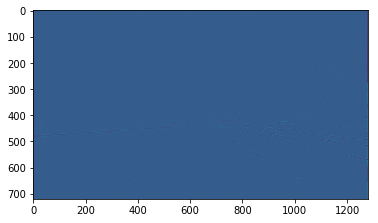

In [30]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import os


# image_name = 'solidYellowCurve2'
read_file = 'test_images/curved-lane.jpg'
output_file = 'test_images/curved-lane_Lane.jpg'
#reading in an image
frame = cv2.imread(read_file)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# image = gaussian_blur(image,kernel_size=3)
# plt.imshow(image)
# image = np.float64(mpimg.imread(read_file))/255



# Convert to HSV for simpler calculations 
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 



# Calcution of Sobelx 
sobelx = cv2.Sobel(hsv,cv2.CV_64F,1,0,ksize=5) 

# Calculation of Sobely 
sobely = cv2.Sobel(hsv,cv2.CV_64F,0,1,ksize=5) 

# Calculation of Laplacian 
laplacian = cv2.Laplacian(hsv,cv2.CV_64F) 

plt.imshow(sobelx) 
plt.imshow(sobely) 
plt.imshow(laplacian) 














# sobelx = cv2.Sobel(image,cv2.CV_64F,1,0) # Find x and y gradients
# sobely = cv2.Sobel(image,cv2.CV_64F,0,1)

# # Find magnitude and angle
# magnitude = np.sqrt(sobelx**2.0 + sobely**2.0)
# angle = np.arctan2(sobely, sobelx) * (180 / np.pi)
# # hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
# # print(magnitude,angle)
# plt.imshow(magnitude/(4*math.sqrt(2)),cmap='gray')
# plt.imshow((angle+180)/360,cmap='gray')